<a href="https://colab.research.google.com/github/DSamson24/Big_Mart_Sales/blob/master/Big_Mart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [0]:
bigmart=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Big_Mart/train.csv')
bigmart_test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Big_Mart/test.csv')

In [3]:
bigmart.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
bigmart['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [0]:

bigmart['Item_Fat_Content']=bigmart['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
bigmart['Item_Fat_Content']=bigmart['Item_Fat_Content'].replace('reg','Regular')

In [6]:
bigmart['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [7]:
bigmart.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [8]:
bigmart['Item_Weight'].isnull().sum()

1463

In [9]:
bigmart['Item_Weight']=bigmart.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))
bigmart['Item_Weight'].isnull().sum()

4

In [10]:
bigmart['Item_Weight']=bigmart['Item_Weight'].fillna(bigmart['Item_Weight'].mean())
bigmart['Item_Weight'].isnull().sum()

0

In [12]:
bigmart['Outlet_Size'].isnull().sum()

2410

In [13]:
bigmart['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
bigmart.groupby('Outlet_Identifier')['Outlet_Size'].count() 

Outlet_Identifier
OUT010      0
OUT013    932
OUT017      0
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045      0
OUT046    930
OUT049    930
Name: Outlet_Size, dtype: int64

In [15]:
bigmart.groupby('Outlet_Location_Type')['Outlet_Size'].count()

Outlet_Location_Type
Tier 1    2388
Tier 2     930
Tier 3    2795
Name: Outlet_Size, dtype: int64

In [16]:
bigmart.groupby('Outlet_Type')['Outlet_Size'].count()

Outlet_Type
Grocery Store         528
Supermarket Type1    3722
Supermarket Type2     928
Supermarket Type3     935
Name: Outlet_Size, dtype: int64

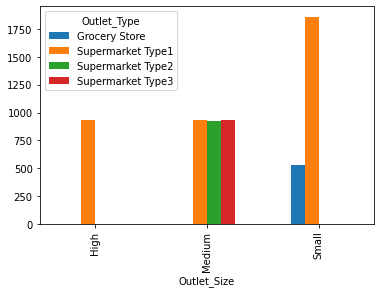

In [17]:
table=pd.crosstab(bigmart['Outlet_Size'],bigmart['Outlet_Type'])
table
table.plot(kind='bar')

In [18]:
bigmart.groupby(['Outlet_Type','Outlet_Location_Type','Outlet_Size'])['Outlet_Size'].count()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small          528
Supermarket Type1  Tier 1                Medium         930
                                         Small          930
                   Tier 2                Small          930
                   Tier 3                High           932
Supermarket Type2  Tier 3                Medium         928
Supermarket Type3  Tier 3                Medium         935
Name: Outlet_Size, dtype: int64

In [19]:
bigmart.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].count()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 1                   528
                   Tier 3                     0
Supermarket Type1  Tier 1                  1860
                   Tier 2                   930
                   Tier 3                   932
Supermarket Type2  Tier 3                   928
Supermarket Type3  Tier 3                   935
Name: Outlet_Size, dtype: int64

In [0]:
bigmart['Outlet_Size'].loc[bigmart['Outlet_Type']== 'Grocery Store']=bigmart['Outlet_Size'].loc[bigmart['Outlet_Type']== 'Grocery Store'].fillna('Small')

In [0]:
bigmart['Outlet_Size'].loc[bigmart['Outlet_Type']== 'Supermarket Type1']=bigmart['Outlet_Size'].loc[bigmart['Outlet_Type']== 'Supermarket Type1'].fillna('Small')

In [22]:
bigmart['Outlet_Size'].isnull().sum()

0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

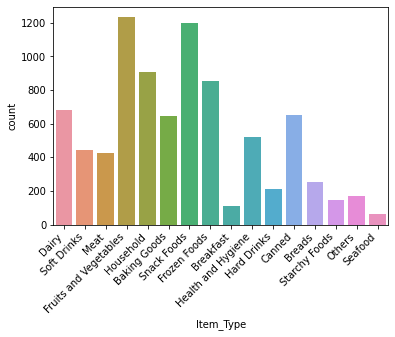

In [23]:
sns.countplot(bigmart['Item_Type'])
plt.xticks(rotation=45,ha='right')

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

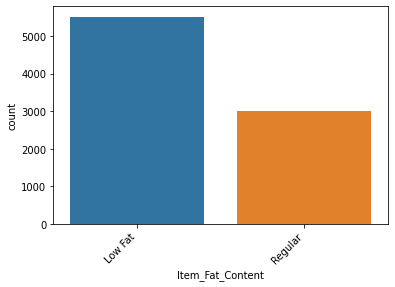

In [24]:
sns.countplot(bigmart['Item_Fat_Content'])
plt.xticks(rotation=45,ha='right')

(array([   0,    1,    2, ..., 1556, 1557, 1558]),
 <a list of 1559 Text major ticklabel objects>)

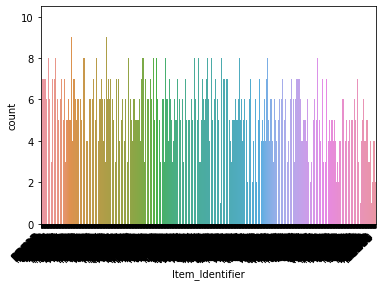

In [25]:
sns.countplot(bigmart['Item_Identifier'])
plt.xticks(rotation=45,ha='right')

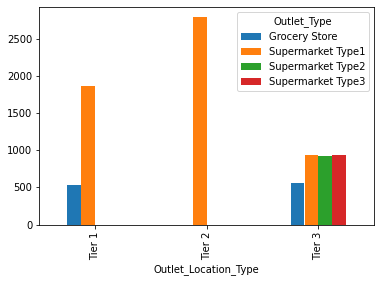

In [26]:
table1=pd.crosstab(bigmart['Outlet_Location_Type'],bigmart['Outlet_Type'])
table1.plot(kind='bar')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

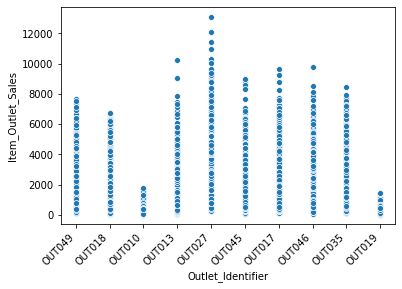

In [27]:
sns.scatterplot(bigmart['Outlet_Identifier'],bigmart['Item_Outlet_Sales'])
plt.xticks(rotation=45,ha='right')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

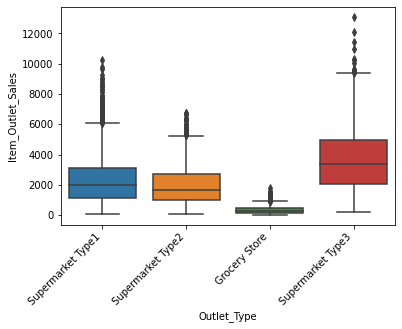

In [28]:
sns.boxplot(bigmart['Outlet_Type'],bigmart['Item_Outlet_Sales'])
plt.xticks(rotation=45,ha='right')

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

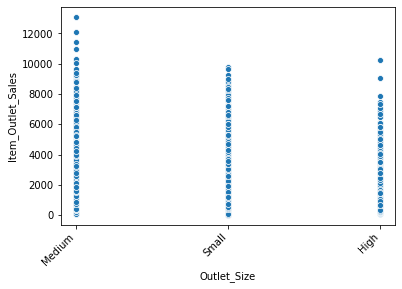

In [29]:
sns.scatterplot(bigmart['Outlet_Size'],bigmart['Item_Outlet_Sales'])
plt.xticks(rotation=45,ha='right')

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

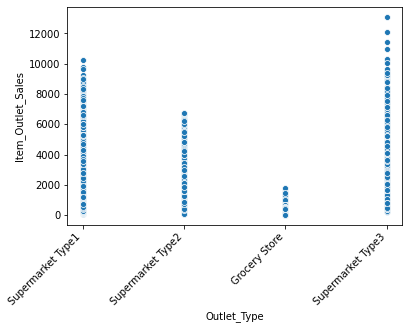

In [30]:
sns.scatterplot(bigmart['Outlet_Type'],bigmart['Item_Outlet_Sales'])
plt.xticks(rotation=45,ha='right')

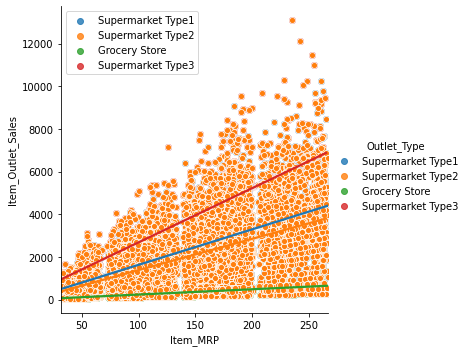

In [31]:
correlation=bigmart.corr()
sns.lmplot(x='Item_MRP', y='Item_Outlet_Sales',hue='Outlet_Type', data=bigmart);
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=bigmart)

In [0]:
bigmart['Outlet_Years_Of_Sales']=pd.datetime.now().year-bigmart['Outlet_Establishment_Year']
del bigmart['Outlet_Establishment_Year']